# Logistic Regression on Amzon Fine Food Review

# Amazon Fine Food Review is about the reviews of customers on the food.

Number of columns: 10
Number of rows: 568454
Number of reviews: 568454
Number of products: 74258
Number of users: 256059

# Attribute information:
 
1) Id: Number of rows

2) ProductId: Unique ID of product 

3) UserId: User identification number

4) ProfileName: User name

5) HelpfulnessNumerator: Number of user found the review helpful

6) HelpfulnessDenominator: Number of user who found the review helpful or not

7) Score: Rating given to the product

8) Time: Timestamp at the time of review posted

9) Summary: Short version of text review

10) Text: Detailed text review

# Objective:

We need to find if the review is positive (1) or negative (0).

We are provided with the score from 1 to 5. Let's assume score 1 & 2 are negative and score 4 & 5 are positive. We are ignoring 3 as it can be considered as neutral.

# Loading Dataset

In [813]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt
%matplotlib inline

from time import time

# warnings library is to ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [769]:
# Importing dataset

df = pd.read_csv('Reviews.csv')

# Displaying first 5 rows
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Data Information

In [770]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [771]:
print('Number of columns:' + ' ' + str(len(df.columns)))
print('Number of rows:' + ' ' + str(df['Id'].nunique()))
print('Number of reviews:' + ' ' + str(df['Id'].nunique()))
print('Number of products:' + ' ' + str(df['ProductId'].nunique()))
print('Number of users:' + ' ' + str(df['UserId'].nunique()))

Number of columns: 10
Number of rows: 568454
Number of reviews: 568454
Number of products: 74258
Number of users: 256059


# Assign Polarity

Let us assign positive (1) to the score 4 and 5

Let us assign negative (0) to the score 1 and 2

Let us ignore score having 3

In [772]:
# Let us first create a new dataset which doesn't have score 3 and it's respective rows.

print('Number of rows before removing score 3:' + ' ' + str(df['Id'].nunique()))

df_score = df[df['Score'] != 3]

print('Number of rows after removing score 3:' + ' ' + str(df_score['Id'].nunique()))

Number of rows before removing score 3: 568454
Number of rows after removing score 3: 525814


In [774]:
# Defining a function to assign polarity.

def scr(sc):
    if sc > 3:
        return 1
    return 0

In [775]:
# Calling function to assign polarity using .apply()
df_score['Score'] = df_score['Score'].apply(scr)

print("Number of positive (1) and negative (0) reviews")

df_score['Score'].value_counts()

Number of positive (1) and negative (0) reviews


1    443777
0     82037
Name: Score, dtype: int64

# Exploratory Data Analysis

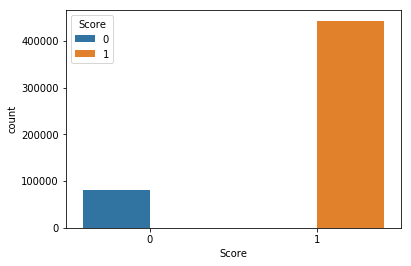

In [776]:
sns.countplot(df_score['Score'], hue = df_score['Score'])

# Observation:

As we can see, number of negative reviews are closer to 10k while positive review is more than 400k.

Ratio of negative and positive review can be assumed to be ~ 1:4.

Also, we can conclude that ~90% of the reviews are positive.

# Data Cleaning:

We have performed few techniques to clean the text and summary data

1) Null values removed

2) Duplicates removed

3) URL links removed

4) HTML tags removed

5) Stopwords removed

6) Stem words obtained

7) Converted from short form word to long form word

We have already performed above data clearning technique and saved.

Importing the clean data.

In [805]:
df_clean = pd.read_csv('Amazon_Final_time.csv')

df_clean = df_clean.dropna()

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364149 entries, 150523 to 327600
Data columns (total 12 columns):
Id                        364149 non-null int64
ProductId                 364149 non-null object
UserId                    364149 non-null object
ProfileName               364149 non-null object
HelpfulnessNumerator      364149 non-null int64
HelpfulnessDenominator    364149 non-null int64
Score                     364149 non-null int64
Time                      364149 non-null int64
Summary                   364149 non-null object
Text                      364149 non-null object
Clean_Text                364149 non-null object
Clean_Summary             364149 non-null object
dtypes: int64(5), object(7)
memory usage: 36.1+ MB


In [806]:
percentage_red = np.round((df_clean.shape[0]/df.shape[0]),5)*100
print("Data percentage reduced to ", percentage_red)

Data percentage reduced to  64.05999999999999


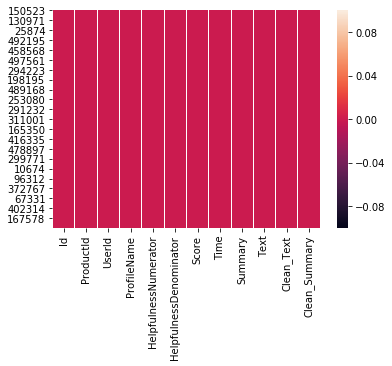

In [809]:
sns.heatmap(df_clean.isnull())

# Observation:
    
There are no null values now. We are good to go to proceed with vectorization

# 100k dataframe

Picking up random 100k samples from the dataset

In [851]:
df_100k = df_clean.sample(n = 100000)

print("Shape of sample dataframe is ", df_100k.shape)
print("Total number of rows: ", df_100k.shape[0])
print("Total number of columns: ", df_100k.shape[1])

Shape of sample dataframe is  (100000, 12)
Total number of rows:  100000
Total number of columns:  12


# Time Series Split

Since the dataset is based on time series, we need to sort based on time in an ascending order

In [852]:
df_sort_100k = df_100k.sort_values('Time', ascending = True)

In [853]:
x_100k = df_sort_100k['Clean_Text']
y_100k = df_sort_100k['Score']

print(x_100k.shape)
print(y_100k.shape)

(100000,)
(100000,)


# Defining function to find the optimal hyperparameter tuning along with best regularization or penalty.

In [854]:
# Defining function to find the optimal hyperparameter tuning along with best regularization.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

c = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

def scr(pen, x_train, x_cv, y_train, y_cv):
    
    auc_cv = []                                            # Stores all auc score of cv
    auc_train = []                                         # Stores all auc score of train
    
    for i in c:
        lr = LogisticRegression(penalty = pen, C = i)
        lr = lr.fit(x_train, y_train)
    
    # Get the AUC score for cv
        lr_pred_cv = lr.predict_proba(x_cv)[:,1]
        lr_auc_cv = roc_auc_score(y_cv, lr_pred_cv)
        auc_cv.append(lr_auc_cv)
    
    # Get the AUC score for train
        lr_pred_train = lr.predict_proba(x_train)[:,1]
        lr_auc_train = roc_auc_score(y_train, lr_pred_train)
        auc_train.append(lr_auc_train)
    
    scr_cv = [x for x in auc_cv]
    opt_cv = c[scr_cv.index(max(scr_cv))]
    print("Maximum AUC score of CV is:" + ' ' + str(max(scr_cv)) )
    print("Corresponding C value of train is:", opt_cv, '\n')

    scr_train = [x for x in auc_train]
    opt_train = c[scr_train.index(max(scr_train))]
    print("Maximum AUC score of train is:" + ' ' + str(max(scr_train)) )
    print("Corresponding C value of train is:", opt_train, '\n')
    
    plt.figure(figsize = (10,6))
    
    plt.plot(c, scr_cv, label = 'CV curve', marker = 'o', color = 'blue', markerfacecolor = 'g', markersize = '10', alpha = 0.5)
    for xy in zip(c, np.round(scr_cv,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.plot(c, scr_train, label = 'Train curve', marker = '*', color = 'black', markerfacecolor = 'r', markersize = '10', alpha = 0.5)
    for xy in zip(c, np.round(scr_train,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    
    plt.legend()
    plt.xlabel("C values")
    plt.ylabel("AUC values")
    plt.title("C values v/s AUC")

# Defining a funtion to check model performance with ROC curve

In [855]:
from sklearn import metrics

def mod_per(p, c, train_x, test_x, train_y, test_y):
    lr = LogisticRegression(penalty = 'l2', C = 100)
    lr = lr.fit(train_x, train_y)
    lr_pred = lr.predict_proba(test_x)[:,1]
    fpr, tpr, threshold = metrics.roc_curve(test_y, lr_pred)
    roc_auc_curve = metrics.auc(fpr, tpr)

    plt.title('ROC curve for train and cv')
    plt.plot(fpr, tpr, 'b', label = roc_auc_curve)
    plt.legend()
    plt.plot([0, 1], [0, 1],'r--')

    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

# Split into train and test set

In [856]:
# Split into train and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_100k, y_100k, random_state = 0, shuffle = False, test_size = 0.2)

# Bag of Words (BoW)

In [857]:
# Import CountVectorizer library
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance
cv = CountVectorizer(ngram_range = (1,2))

# Fit and transform x_train set
x_train_b_f = cv.fit_transform(x_train)

# Transform x_test set
x_test_b_f = cv.transform(x_test)

In [858]:
# Normalize to bring vectors into same frame
# Import normalize library

from sklearn.preprocessing import normalize

x_train_b_n = normalize(x_train_b_f)

x_test_b_n = normalize(x_test_b_f)

In [859]:
# Split into train and cv

from sklearn.model_selection import train_test_split

x_tr_b, x_cv_b, y_tr_b, y_cv_b = train_test_split(x_train_b_n, y_train, random_state = 0, shuffle = False, test_size = 0.2)

# Find best penalty and hyperparameter

In [ ]:
print('*'*25)
print("With penalty as l1 norm")
print('*'*25, '\n')
scr('l1', x_tr_b, x_cv_b, y_tr_b, y_cv_b)

print('*'*25)
print("With penalty as l2 norm")
print('*'*25, '\n')
scr('l2', x_tr_b, x_cv_b, y_tr_b, y_cv_b)

# Observation:

With respect to CV, high AUC score is 95.3 with penalty 'l2' and hyperparameter 10.
Wit respect to train, high AUC score is 100 with penalty 'l1' and 'l2' and hyperparameter 100.

But AUC 100% might lead to overfitting. So, we will consider penalty 'l2' and hyperparameter 100

# Model performance on train and cv with ROC curve

Calling model performance function

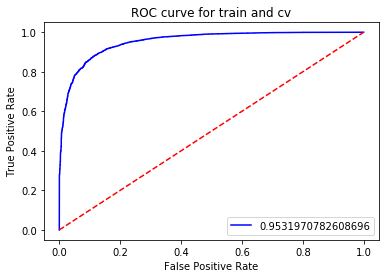

In [861]:
# Calling model performance function

mod_per('l2', 10, x_tr_b, x_cv_b, y_tr_b, y_cv_b)

# Observation:
    
We got 0.953 which 95.3% AUC score. Probability of model in separating positive and negative reply is 95.3%

# Applying logistic regression on test data with penalty l2 norm and C 10

In [862]:
lr_te_b = LogisticRegression(penalty = 'l2', C = 10)
lr_te_b = lr_te_b.fit(x_train_b_n, y_train)
pred_te_b = lr_te_b.predict(x_test_b_n)

# predict_proba_ for roc_auc_score
pred_te_prob_b = lr_te_b.predict_proba(x_test_b_n)[:,1]

# Metrics

ROC AUC score is  0.956 

**************************************************
f1 score is  0.953 

**************************************************
Precision score is  0.935 

**************************************************
ROC AUC Score is  0.973 

**************************************************
Classification report 

              precision    recall  f1-score   support

           0       0.84      0.68      0.75      3474
           1       0.93      0.97      0.95     16526

   micro avg       0.92      0.92      0.92     20000
   macro avg       0.89      0.82      0.85     20000
weighted avg       0.92      0.92      0.92     20000

**************************************************
Confusion matrix table: 



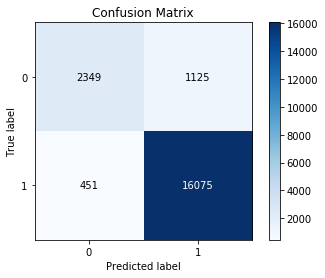

In [863]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, classification_report

rab = np.round(roc_auc_score(y_test, pred_te_prob_b),3)
print("ROC AUC score is ", rab, '\n')
print('*'*50)

fb = np.round(f1_score(y_test, pred_te_b),3)
print("f1 score is ", fb, '\n')
print('*'*50)

pb = np.round(precision_score(y_test, pred_te_b),3)
print("Precision score is ", pb, '\n')
print('*'*50)

reb = np.round(recall_score(y_test, pred_te_b),3)
print("ROC AUC Score is ", reb, '\n')
print('*'*50)

print("Classification report", '\n')
print(classification_report(y_test, pred_te_b))
print('*'*50)

# Referred from: https://scikit-plot.readthedocs.io/en/stable/Quickstart.html
print("Confusion matrix table:", '\n')
skplt.metrics.plot_confusion_matrix(y_test, pred_te_b)

# ROC curve on train and test

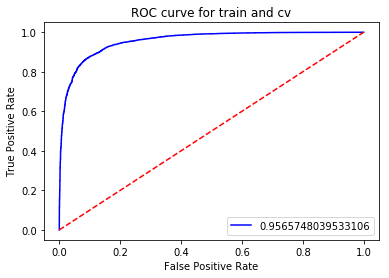

In [864]:
# Calling model performance function

mod_per('l2', 10, x_train_b_n, x_test_b_n, y_train, y_test)

# Observation:
    
Threshold value: 0.5
    
AUC we got is 0.95 which means the probability of separation of positive and negative review will be ~95% good.

Curve represents the ROC while the area under the curve represents the AUC (Area Under Curve)

# TF-IDF

In [865]:
# Import Tf-Idf
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance
tf = TfidfVectorizer(ngram_range = (1,2))

# Fit and transform the x_train
x_train_tf = tf.fit_transform(x_train)

# Transform the x_test
x_test_tf = tf.transform(x_test)

# Normalization

In [870]:
# Normalize train and test data

x_train_tn = normalize(x_train_tf)
x_test_tn = normalize(x_test_tf)

print("Shape of normalized TFIDF train data:" + ' ' + str(x_train_tn.shape))
print("Shape of normalized TFIDF test data:" + ' ' + str(x_test_tn.shape))

Shape of normalized TFIDF train data: (80000, 1108761)
Shape of normalized TFIDF test data: (20000, 1108761)


# Split into train and cv

In [871]:
# Split into train and cv

x_tr_t, x_cv_t, y_tr_t, y_cv_t = train_test_split(x_train_tn, y_train, random_state = 0, test_size = 0.2, shuffle = False)

# Find best penalty and hyperparameter tuning

Calling the function 'scr'

*************************
With penalty as l1 norm
************************* 

Maximum AUC score of CV is: 0.9475416248447205
Corresponding C value of train is: 10 

Maximum AUC score of train is: 1.0
Corresponding C value of train is: 100 

*************************
With penalty as l2 norm
************************* 

Maximum AUC score of CV is: 0.9539565979296066
Corresponding C value of train is: 100 

Maximum AUC score of train is: 1.0
Corresponding C value of train is: 100 



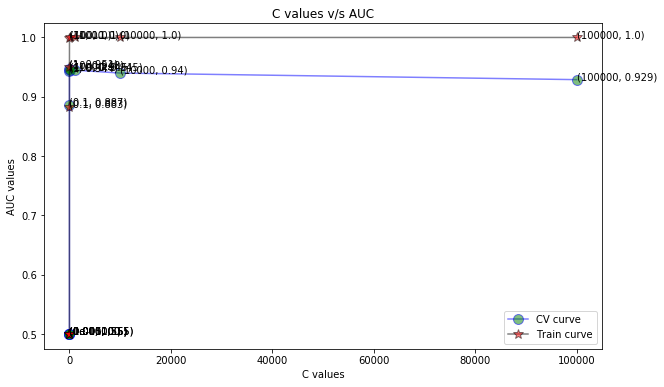

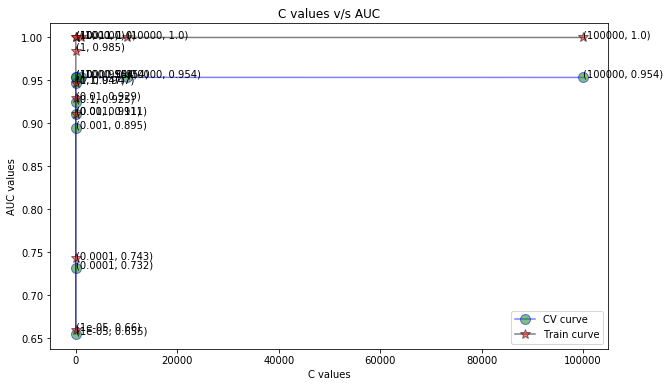

In [872]:
# Calling the function 'scr'

print('*'*25)
print("With penalty as l1 norm")
print('*'*25, '\n')
scr('l1', x_tr_t, x_cv_t, y_tr_t, y_cv_t)

print('*'*25)
print("With penalty as l2 norm")
print('*'*25, '\n')
scr('l2', x_tr_t, x_cv_t, y_tr_t, y_cv_t)

# Observation:

With respect to CV, high AUC score is 95% with penalty 'l2' and hyperparameter 100.
Wit respect to train, high AUC score is 100 with penalty 'l1' and 'l2' and hyperparameter 100.

But AUC 100% might lead to overfitting. So, we will consider penalty 'l2' and hyperparameter 100.

# Model performance on train and cv with ROC curve

Calling model performance function

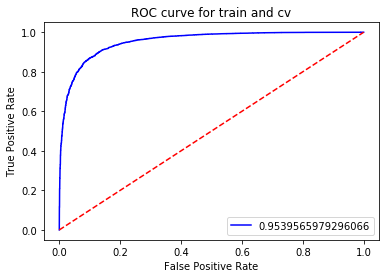

In [873]:
# Calling model performance function

mod_per('l2', 100, x_tr_t, x_cv_t, y_tr_t, y_cv_t )

# Observation:
    
We got 0.9539 which 95% AUC score. Probability of model in separating positive and negative reply is 95%

# Applying logistic regression on test data with penalty l2 norm and hyperparameter 100

In [874]:
lr_te_t = LogisticRegression(penalty = 'l2', C = 100)
lr_te_t = lr_te_t.fit(x_train_tn, y_train)
pred_te_t = lr_te_t.predict(x_test_tn)

# predict_proba_ for roc_auc_score
pred_te_prob_t = lr_te_t.predict_proba(x_test_tn)[:,1]

# Metrics

ROC AUC score is  0.958 

**************************************************
f1 score is  0.954 

**************************************************
Precision score is  0.935 

**************************************************
ROC AUC Score is  0.974 

**************************************************
Classification report 

              precision    recall  f1-score   support

           0       0.85      0.68      0.75      3474
           1       0.94      0.97      0.95     16526

   micro avg       0.92      0.92      0.92     20000
   macro avg       0.89      0.83      0.85     20000
weighted avg       0.92      0.92      0.92     20000

**************************************************
Confusion matrix table: 



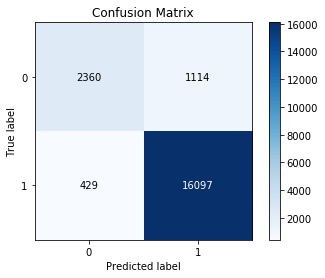

In [875]:
rat = np.round(roc_auc_score(y_test, pred_te_prob_t),3)
print("ROC AUC score is ", rat, '\n')
print('*'*50)

ft = np.round(f1_score(y_test, pred_te_t),3)
print("f1 score is ", ft, '\n')
print('*'*50)

pt = np.round(precision_score(y_test, pred_te_t),3)
print("Precision score is ", pt, '\n')
print('*'*50)

ret = np.round(recall_score(y_test, pred_te_t),3)
print("ROC AUC Score is ", ret, '\n')
print('*'*50)

print("Classification report", '\n')
print(classification_report(y_test, pred_te_t))
print('*'*50)

# Referred from: https://scikit-plot.readthedocs.io/en/stable/Quickstart.html
print("Confusion matrix table:", '\n')
skplt.metrics.plot_confusion_matrix(y_test, pred_te_t)

# Model performance on test data

Calling model performance function

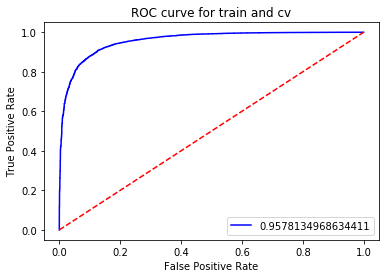

In [876]:
# Calling model performance function

mod_per('l2', 100, x_train_tn, x_test_tn, y_train, y_test)

# Observation:
    
Threshold value: 0.5
    
AUC we got is 0.9578 which means the probability of separation of positive and negative review will be ~95.78% good.

Curve represents the ROC while the area under the curve represents the AUC (Area Under Curve)

# Word2Vec

In [877]:
w2v = []
for text in df_sort_100k['Clean_Text']:
    split = text.split()
    w2v.append(split)

In [878]:
# import gensim library
import gensim

#Create an instance for the genism model
w2v_model = gensim.models.Word2Vec(w2v, min_count = 5, size = 50, workers = 4)

print(w2v_model)


# Creating own corpus vocabulary
w2v_vocab = w2v_model[w2v_model.wv.vocab]

print("Shape of w2v_vocab:" + ' ' + str(w2v_vocab.shape))


# Creating list of words
w2v_word = list(w2v_model.wv.vocab)

print("Length of w2v_word:" + ' ' + str(len(w2v_word)), '\n')

print('*'*50)

print("First 10 words from the list of words w2v_word:")
w2v_word[:10]

Word2Vec(vocab=13186, size=50, alpha=0.025)
Shape of w2v_vocab: (13186, 50)
Length of w2v_word: 13186 

**************************************************
First 10 words from the list of words w2v_word:


['twist',
 'captur',
 'film',
 'star',
 'michael',
 'keaton',
 'geena',
 'davi',
 'prime',
 'tim']

In [879]:
# Let's check the most similar words

w2v_model.wv.most_similar('love')

[('ador', 0.6973414421081543),
 ('enjoy', 0.684172511100769),
 ('awesom', 0.6147879362106323),
 ('favorit', 0.6041017174720764),
 ('like', 0.575928270816803),
 ('terrif', 0.571923553943634),
 ('yummi', 0.560472846031189),
 ('great', 0.5565832257270813),
 ('fabul', 0.5535968542098999),
 ('fantast', 0.5441645383834839)]

# Observation:
As we can see, .most_similar gives the similar words to the input word along with the percentage of similarity

# Average Word2Vec

Convert Word2Vec to vectors.

Average Word2Vec is nothing but the average of vectors of each word of a given text/review/sentence.

In [880]:
sentence = [] # avg w2v of sentence/review will be stored in the empty list

for sen in w2v:
    zero = np.zeros(50)  # (50,) matrix which is initial to add to the first w2v of word in a sentence/review
    count_div = 0         # Increases by 1 every iteration and divides the w2v the sum of w2v sentence/review
    for word in sen:
        if word in w2v_word:
            vec = w2v_model.wv[word]  # Gets the w2v for each word in a sentence/review
            zero += vec              # Sums the w2v of each word in a sentence/review at every iteration
            count_div += 1           # Increases by 1 at every iteration
    if count_div != 0:
        zero /= count_div            # w2v of sentence/review is divided by total number of words in a sentence/review (average w2v)
    sentence.append(zero)            # Stores all the avg w2z in an empty list sentence

# Normalization

In [881]:
sent_avg_n = normalize(sentence)

print("Shape of normalized Avg Word2Vec:" + ' ' + str(len(sent_avg_n)))

Shape of normalized Avg Word2Vec: 100000


# Split into train, cv and test

In [882]:
#Split into train and test data.

x_train_avg, x_test_avg, y_train_avg, y_test_avg = train_test_split(sent_avg_n, y_100k, test_size = 0.2,
                                                             random_state = 0, shuffle = False )


# Split into train and cv
x_tr_avg, x_cv_avg, y_tr_avg, y_cv_avg = train_test_split(x_train_avg, y_train_avg, random_state = 0,
                                                          test_size = 0.2, shuffle = False)

# Find best penalty and hyperparameter

Calling 'scr' function

*************************
With penalty as l1 norm
************************* 

Maximum AUC score of CV is: 0.903521285300207
Corresponding C value of train is: 1 

Maximum AUC score of train is: 0.9076025005899366
Corresponding C value of train is: 1 

*************************
With penalty as l2 norm
************************* 

Maximum AUC score of CV is: 0.9035513374741201
Corresponding C value of train is: 1 

Maximum AUC score of train is: 0.9076275076431473
Corresponding C value of train is: 1 



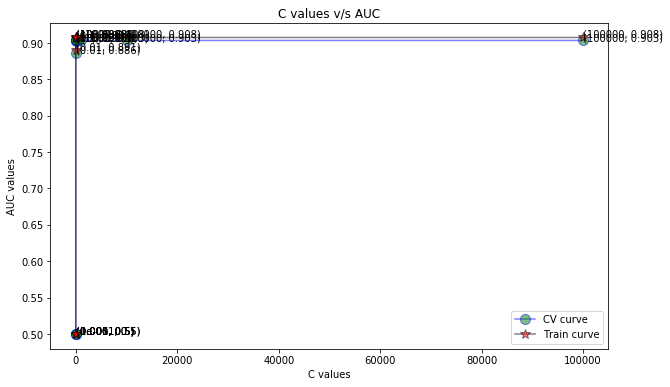

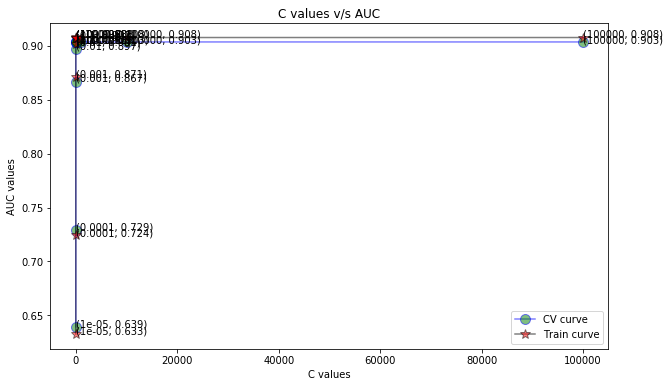

In [883]:
print('*'*25)
print("With penalty as l1 norm")
print('*'*25, '\n')
scr('l1', x_tr_avg, x_cv_avg, y_tr_avg, y_cv_avg)

print('*'*25)
print("With penalty as l2 norm")
print('*'*25, '\n')
scr('l2', x_tr_avg, x_cv_avg, y_tr_avg, y_cv_avg)

# Observation:

With respect to CV, high AUC score is ~90% with penalty 'l1' and 'l2' and hyperparameter 1.
Wit respect to train, high AUC score is ~90% with penalty 'l1' and 'l2' and hyperparameter 1.

we can consider penalty either 'l1' or 'l2' and hyperparameter 1.

# Model performance on train and cv with ROC curve

Calling model performance function

With penalty as l1 norm and hypperparameter 1


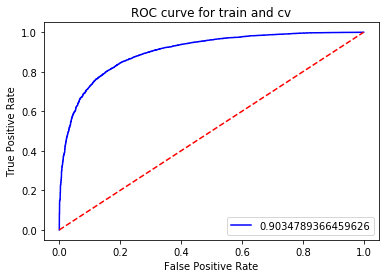

In [885]:
# Calling model performance function

print("With penalty as l1 norm and hypperparameter 1")

mod_per('l1', 1, x_tr_avg, x_cv_avg, y_tr_avg, y_cv_avg)

# Observation:
    
We got 0.903 which 90% AUC score. Probability of model in separating positive and negative reply is 90%

# Applying logistic regression on test data with penalty l1 and hyperparameted 1

In [886]:
lr_te_avg = LogisticRegression(penalty = 'l1', C = 1)
lr_te_avg = lr_te_avg.fit(x_train_avg, y_train)
pred_te_avg = lr_te_avg.predict(x_test_avg)

# predict_proba_ for roc_auc_score
pred_te_prob_avg = lr_te_avg.predict_proba(x_test_avg)[:,1]

# Metrics

ROC AUC score is  0.907 

**************************************************
f1 score is  0.932 

**************************************************
Precision score is  0.904 

**************************************************
ROC AUC Score is  0.961 

**************************************************
Classification report 

              precision    recall  f1-score   support

           0       0.74      0.52      0.61      3474
           1       0.90      0.96      0.93     16526

   micro avg       0.88      0.88      0.88     20000
   macro avg       0.82      0.74      0.77     20000
weighted avg       0.88      0.88      0.88     20000

**************************************************
Confusion matrix table: 



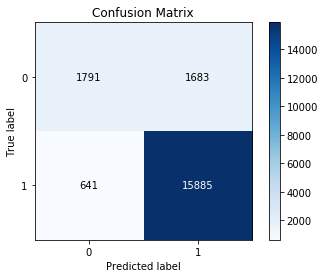

In [887]:
ra_avg = np.round(roc_auc_score(y_test_avg, pred_te_prob_avg),3)
print("ROC AUC score is ", ra_avg, '\n')
print('*'*50)

f_avg = np.round(f1_score(y_test_avg, pred_te_avg),3)
print("f1 score is ", f_avg, '\n')
print('*'*50)

p_avg = np.round(precision_score(y_test_avg, pred_te_avg),3)
print("Precision score is ", p_avg, '\n')
print('*'*50)

re_avg = np.round(recall_score(y_test_avg, pred_te_avg),3)
print("ROC AUC Score is ", re_avg, '\n')
print('*'*50)

print("Classification report", '\n')
print(classification_report(y_test_avg, pred_te_avg))
print('*'*50)

# Referred from: https://scikit-plot.readthedocs.io/en/stable/Quickstart.html
print("Confusion matrix table:", '\n')
skplt.metrics.plot_confusion_matrix(y_test_avg, pred_te_avg)

# ROC curve on test data

Calling model performance function

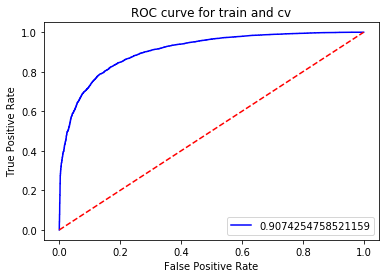

In [888]:
# Calling model performance function

mod_per('l1', 1, x_train_avg, x_test_avg, y_train_avg, y_test_avg)

# Observation:
    
Threshold value: 0.5
    
AUC we got is 0.90 which means the probability of separation of positive and negative review will be ~90% good.

Curve represents the ROC while the area under the curve represents the AUC (Area Under Curve)

# TF-IDF Word2Vec

In [889]:
tf_model = TfidfVectorizer()

tf_idf_matrix = tf_model.fit_transform(df_sort_100k['Clean_Text'].values)

# we are converting a dictionary with word as a key, and the idf as a value

dicti = dict(zip(tf_model.get_feature_names(), list(tf_model.idf_)))

In [890]:
tf_sentence = []   # Empty list to store the tfidf-w2v values

for tf_sent in w2v:
    tf_zero = np.zeros(50)     # (50,) matrix which is initial to add to the first w2v of word in a sentence/review
    tf_count = 0                # Increases by tfidf value of previous tfidf value for every iteration and divides the sum of tfidf-w2v of sentence/review
    for tf_word in tf_sent:
        if tf_word in w2v_word:
            tf_vec = w2v_model.wv[tf_word]  # Get tfidf_w2v for each word in a sentence/review       
            if tf_word in dicti:
                # tf_w2v = tf_idf_matrix[row, tf_feat.index(tf_word)]
                tf_w2v = dicti[tf_word] * (tf_sent.count(tf_word))/len(tf_sent) 
                tf_zero += (tf_vec * tf_w2v)    # Increase by tfidf-w2v value for every iteration
                tf_count += tf_w2v              # Increase by ifidf value for every iteration
    if tf_count != 0:
        tf_zero /= tf_count                     # tfidf-w2v of sentence/review is divided by total number of tfidf of words in a sentence/review (tfidf-w2v)
    tf_sentence.append(tf_zero)                # Stores all the avg w2z in an empty list sentence

# Normalization

In [891]:
sent_tw_n = normalize(tf_sentence)

print("Shape of normalized TF-IDF Word2Vec:" + ' ' + str(len(sent_tw_n)))

Shape of normalized TF-IDF Word2Vec: 100000


# Split into train, cv and test

In [892]:
#Split into train and test data.

x_train_tw, x_test_tw, y_train_tw, y_test_tw = train_test_split(sent_tw_n, y_100k, test_size = 0.2,
                                                             random_state = 0, shuffle = False )


# Split into train and cv
x_tr_tw, x_cv_tw, y_tr_tw, y_cv_tw = train_test_split(x_train_tw, y_train_tw, random_state = 0,
                                                          test_size = 0.2, shuffle = False)

# Find best penalty and hyperparameter

Calling 'scr' function

With penalty as l1 norm
************************* 

Maximum AUC score of CV is: 0.8732374923395445
Corresponding C value of train is: 10 

Maximum AUC score of train is: 0.8805123426166626
Corresponding C value of train is: 1 

*************************
With penalty as l2 norm
************************* 

Maximum AUC score of CV is: 0.8732488612836439
Corresponding C value of train is: 1 

Maximum AUC score of train is: 0.8805423503061232
Corresponding C value of train is: 1 



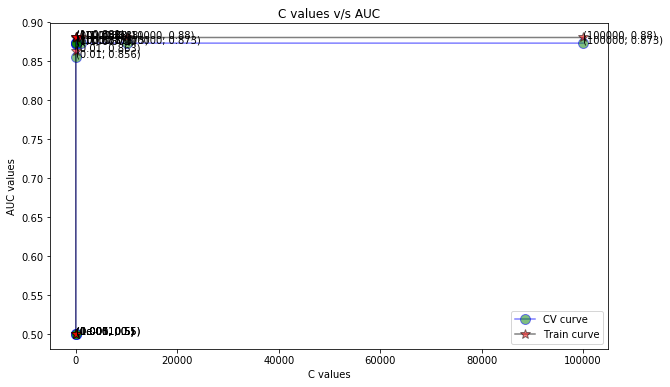

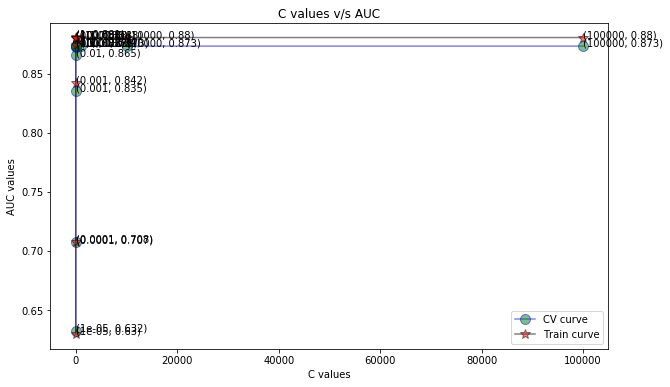

In [893]:
# print('*'*25)
print("With penalty as l1 norm")
print('*'*25, '\n')
scr('l1', x_tr_tw, x_cv_tw, y_tr_tw, y_cv_tw)

print('*'*25)
print("With penalty as l2 norm")
print('*'*25, '\n')
scr('l2', x_tr_tw, x_cv_tw, y_tr_tw, y_cv_tw)

# Observation:

With respect to CV, high AUC score is 87 with penalty 'l1' and 'l2' and hyperparameter 10 and 1.

Wit respect to train, high AUC score is 88 with penalty 'l1' and 'l2' and hyperparameter 1.

we can consider penalty either 'l1' or 'l2' and hyperparameter 1.

# Model performance on train and cv with ROC curve

With penalty as l1 norm and hypperparameter 1


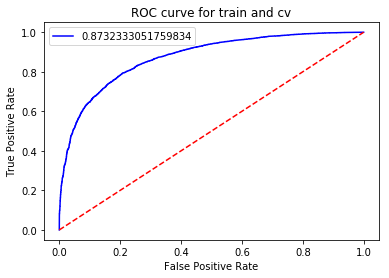

In [898]:
# Calling model performance function

print("With penalty as l1 norm and hypperparameter 1")

mod_per('l1', 1, x_tr_tw, x_cv_tw, y_tr_tw, y_cv_tw)

# Observation:
    
We got 0.87 which 87% AUC score. Probability of model in separating positive and negative reply is 87%

In [895]:
lr_te_tw = LogisticRegression(penalty = 'l1', C = 1)
lr_te_tw = lr_te_tw.fit(x_train_tw, y_train)
pred_te_tw = lr_te_tw.predict(x_test_tw)

# predict_proba_ for roc_auc_score
pred_te_prob_tw = lr_te_tw.predict_proba(x_test_tw)[:,1]

ROC AUC score is  0.88 

**************************************************
f1 score is  0.932 

**************************************************
Precision score is  0.889 

**************************************************
ROC AUC Score is  0.965 

**************************************************
Classification report 

              precision    recall  f1-score   support

           0       0.72      0.43      0.53      3474
           1       0.89      0.96      0.93     16526

   micro avg       0.87      0.87      0.87     20000
   macro avg       0.80      0.69      0.73     20000
weighted avg       0.86      0.87      0.86     20000

**************************************************
Confusion matrix table: 



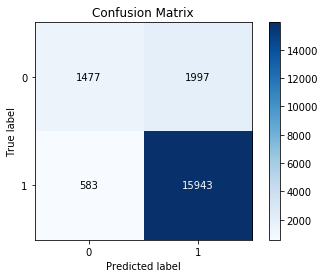

In [896]:
ra_tw = np.round(roc_auc_score(y_test_tw, pred_te_prob_tw),3)
print("ROC AUC score is ", ra_tw, '\n')
print('*'*50)

f_tw = np.round(f1_score(y_test_tw, pred_te_avg),3)
print("f1 score is ", f_tw, '\n')
print('*'*50)

p_tw = np.round(precision_score(y_test_tw, pred_te_tw),3)
print("Precision score is ", p_tw, '\n')
print('*'*50)

re_tw = np.round(recall_score(y_test_tw, pred_te_tw),3)
print("ROC AUC Score is ", re_tw, '\n')
print('*'*50)

print("Classification report", '\n')
print(classification_report(y_test_tw, pred_te_tw))
print('*'*50)

# Referred from: https://scikit-plot.readthedocs.io/en/stable/Quickstart.html
print("Confusion matrix table:", '\n')
skplt.metrics.plot_confusion_matrix(y_test_tw, pred_te_tw)

# Model performance on test data

Calling model performance function

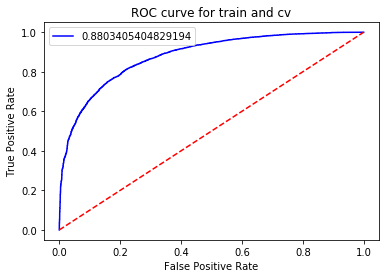

In [897]:
# Calling model performance function

mod_per('l1', 1, x_train_tw, x_test_tw, y_train_tw, y_test_tw)

# Observation:
    
Threshold value: 0.5
    
AUC we got is 0.88 which means the probability of separation of positive and negative review will be ~88% good.

Curve represents the ROC while the area under the curve represents the AUC (Area Under Curve)

# Defining a function to get top 10 positive and negative features

Referred from: https://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers

    

In [899]:
# Referred from: https://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers

def top_features(vectorizer, lr, n):
    
    feat = vectorizer.get_feature_names()             # Gets all the feature names from vecotrizer (BOW, TF-IDF)
    coef = lr.coef_[0]                               # Gets co-efficients of feature names (BOW, TF-IDF)
    fe_co = sorted(zip(coef, feat))                   # Sorts and zips feature names and co-efficients correspondingly
    top_feat = zip(fe_co[:(n+1):-1], fe_co[:n])       # Zips all n number of feature names and co-efficients correspondingly
    
    print("\t  Positive \t\t\t\t\t   Negative \t\t")
    print('-'*100)
    for (fea_1, coe_1), (fea_2, coe_2) in top_feat:              # loop to print n number of features 
        print("\t%.4f\t%-15s\t\t\t\t%.4f\t%-15s" % (fea_1, coe_1, fea_2, coe_2))
          

# Top 10 positive and negative features of BoW

Calling top_features function

In [900]:
# Calling top_features function

print("Top 10 positive and negative features of TF-IDF", '\n')

top_features(cv, lr_te_b, 10)

Top 10 positive and negative features of TF-IDF 

	  Positive 					   Negative 		
----------------------------------------------------------------------------------------------------
	13.6000	delici         				-14.6161	worst          
	11.4655	high recommend 				-13.0355	disappoint     
	11.4043	perfect        				-12.8788	terribl        
	10.8988	excel          				-12.8641	aw             
	10.1514	awesom         				-11.5325	threw          
	10.0770	amaz           				-11.0855	horribl        
	9.1893	worri          				-10.5799	return         
	9.0177	best           				-10.2882	bland          
	8.7651	great          				-10.0433	tasteless      
	8.5321	yummi          				-9.9004	unfortun       


# Top 10 positive and negative features of TF-IDF

Calling top_features function

In [901]:
# Calling top_features function

print("Top 10 positive and negative features of TF-IDF", '\n')

top_features(tf, lr_te_t, 10)

Top 10 positive and negative features of TF-IDF 

	  Positive 					   Negative 		
----------------------------------------------------------------------------------------------------
	32.3542	great          				-30.8190	disappoint     
	31.5227	delici         				-24.5539	worst          
	26.3485	best           				-22.4581	terribl        
	25.2314	perfect        				-21.9672	aw             
	24.7881	love           				-20.5699	return         
	21.8160	excel          				-19.5329	horribl        
	20.2203	good           				-19.2075	threw          
	18.9536	nice           				-18.2318	unfortun       
	18.5835	high recommend 				-16.9002	bland          
	18.2557	amaz           				-16.8789	stale          


# Pertubation test on BoW

Note: Considering penalty l2 and hyperparameter 100 as we got these optimal values from above BoW execution.

Referred from: https://github.com/cyanamous/Amazon-Food-Reviews-Analysis-and-Modelling/blob/master/4%20Amazon%20Food%20Reviews%20-%20Logistic%20Regression.ipynb

In [902]:
from sklearn.linear_model import LogisticRegression

per = LogisticRegression(penalty = 'l2', C = 100)
per = per.fit(x_train_b_n, y_train)
per_pred = per.predict(x_test_b_n)


from sklearn.metrics import accuracy_score

print("Accuracy score before adding noise: ", accuracy_score(y_test, per_pred))
print("Number of non-zero weights before adding noise: ", np.count_nonzero(per.coef_))

Accuracy score before adding noise:  0.9227
Number of non-zero weights before adding noise:  1108761


In [903]:
# Import sparse library to find the sparsity
from scipy.sparse import find

#Weights before adding random noise
weight = find(per.coef_[0])[2]                             # Returns the non-zero elements of the matrices.
print("Weights before adding noise:", '\n')
print(weight[:50])

Weights before adding noise: 

[ 8.55880515e-01  7.63620797e-04  2.75429604e-02  4.09628244e-02
  2.74764052e-02 -9.52409204e-01  1.04970642e-01  3.67322556e-02
  2.91783120e-01 -2.16624307e-02  2.74764052e-02  2.14518689e-02
  8.21755625e-02  2.74764052e-02  3.11493346e-01  8.80649250e-04
  3.66477815e-03  1.33542482e-03  8.65165216e-02  5.75227043e-02
  1.13617157e+00  5.01611891e-02 -1.82189428e-01  2.39447032e-03
  5.54584161e-02  5.02575805e-02 -4.32527142e-01  9.57380886e-01
  4.62897534e-02  6.22487608e-02  1.01422456e-01  1.08915099e-01
  3.19730414e-02 -2.60665875e-01  5.21696500e-01  1.55084101e-01
 -1.49111287e+00  1.45425459e-04  1.45425459e-04  1.27605114e-02
  1.27605114e-02  2.29985598e-04  2.29985598e-04  5.60780236e-02
 -1.19328082e-01 -1.19328082e-01  2.61338948e-02  2.61338948e-02
  1.04819090e-02  1.04819090e-02]


# Adding noise

In [904]:
x_tr_noise = x_train_b_n

# This will add random noise uniformly as low as -0.0001 and as high as 0.0001 to the size of non-zero elements
epsilon = np.random.uniform(low = -0.0001, high = 0.0001, size = (find(x_tr_noise)[0].size,))

# Getting the positions(row and column) and value of non-zero datapoints 
a,b,c = find(x_tr_noise)

# Adding random noise to non-zero datapoints
x_tr_noise[a,b] = epsilon + x_tr_noise[a,b]

In [905]:
from sklearn.linear_model import LogisticRegression

per_noise = LogisticRegression(penalty = 'l2', C = 100)
per_noise = per_noise.fit(x_tr_noise, y_train)
per_pred_noise = per_noise.predict(x_test_b_n)

print("Accuracy score after adding noise: ", accuracy_score(y_test, per_pred_noise))
print("Number of non-zero weights after adding noise: ", np.count_nonzero(per_noise.coef_))

Accuracy score after adding noise:  0.92265
Number of non-zero weights after adding noise:  1108761


In [906]:
from scipy.sparse import find

#Weights before adding random noise
weight_noise = find(per_noise.coef_[0])[2]                      # Returns the non-zero elements of the matrices.
print("Weights after adding noise:", '\n')
print(weight_noise[:50])

Weights after adding noise: 

[ 8.51906109e-01  7.71367302e-04  2.74868235e-02  4.06612239e-02
  2.72762286e-02 -9.52287522e-01  1.05060955e-01  3.66715391e-02
  2.91442520e-01 -2.15374042e-02  2.72763683e-02  2.14152140e-02
  8.21872428e-02  2.73070367e-02  3.11718890e-01  8.69201654e-04
  3.57602859e-03  1.36020388e-03  8.65989943e-02  5.73196140e-02
  1.13437072e+00  5.05210264e-02 -1.82000109e-01  2.39309680e-03
  5.54549362e-02  5.03463232e-02 -4.33261139e-01  9.55481697e-01
  4.58647396e-02  6.17833907e-02  1.01153690e-01  1.08994604e-01
  3.23141994e-02 -2.60831469e-01  5.21121274e-01  1.54845011e-01
 -1.49292536e+00  1.48530170e-04  1.48361127e-04  1.27402387e-02
  1.27268957e-02  2.40448213e-04  2.40628348e-04  5.62791882e-02
 -1.19448667e-01 -1.19379272e-01  2.62156524e-02  2.62027887e-02
  1.03638678e-02  1.03751723e-02]


In [910]:
# Weight difference before and after adding noise

weight_diff = (abs(weight - weight_noise)/weight)

weight_diff

array([ 0.00464365,  0.01014444,  0.00203816, ...,  0.01041574,
       -0.00272603, -0.00271802])

# Defining a function to get the weight difference percentile

In [911]:
def per(wt, n):
    
    for i in n:
        p = np.percentile(wt, i)
        print(str(i) + "th", "percentile is  " + str(p))

In [912]:
# Calling per function to check percentile for 0, 10, ...90, 100

per(weight_diff, range(0,101,10))

0th percentile is  -160.77859884145244
10th percentile is  -0.0015614997882824888
20th percentile is  -0.00025000429989968203
30th percentile is  0.00042626778687510314
40th percentile is  0.0010359422486206269
50th percentile is  0.0017692291407854224
60th percentile is  0.0027674294401870956
70th percentile is  0.004304150064178948
80th percentile is  0.007123937481651043
90th percentile is  0.01448643698379418
100th percentile is  338.91345536019566


# Observation:
    
From the above, we can see that there is a sudden rise in percentage change (from 0.014 to 338.91) in between 90th and 100th percentile.

Now let's check percentile change from 90 to 100 and check for sudden rise

In [913]:
# Calling per function to check percentile for 90,91, ...99, 100

per(weight_diff, range(90,101,1))

90th percentile is  0.01448643698379418
91th percentile is  0.016011091150119332
92th percentile is  0.01778663419660246
93th percentile is  0.019953782522846047
94th percentile is  0.022669714394885188
95th percentile is  0.02621838777620734
96th percentile is  0.03126862016681974
97th percentile is  0.03849014165332166
98th percentile is  0.05252617866180675
99th percentile is  0.0847716082139659
100th percentile is  338.91345536019566


# Observation:
    
We can see that from 99 to 100 there is sudden rise in percentile change i.e from 0.084 to 338.91.

Now we will check for percentile change in between 99 and 100 i.e 99.1, 99.2, .... 99.9, 100.

In [914]:
print("99.1 percentile is  " + str(np.percentile(weight_diff, 99.1)))
print("99.2 percentile is  " + str(np.percentile(weight_diff, 99.2)))
print("99.3 percentile is  " + str(np.percentile(weight_diff, 99.3)))
print("99.4 percentile is  " + str(np.percentile(weight_diff, 99.4)))
print("99.5 percentile is  " + str(np.percentile(weight_diff, 99.5)))
print("99.6 percentile is  " + str(np.percentile(weight_diff, 99.6)))
print("99.7 percentile is  " + str(np.percentile(weight_diff, 99.7)))
print("99.8 percentile is  " + str(np.percentile(weight_diff, 99.8)))
print("99.9 percentile is  " + str(np.percentile(weight_diff, 99.9)))
print("100 percentile is  " + str(np.percentile(weight_diff, 100)))

99.1 percentile is  0.09039923578207751
99.2 percentile is  0.09686621263677322
99.3 percentile is  0.10632738501642303
99.4 percentile is  0.12082224656409113
99.5 percentile is  0.13539878078064504
99.6 percentile is  0.15768231825191842
99.7 percentile is  0.1883108869883948
99.8 percentile is  0.23844823784586944
99.9 percentile is  0.40533475568005556
100 percentile is  338.91345536019566


# Observation:

We can see, sudden rise happens from 99.9 to 100th percentile i.e from 0.405 to 338.91

We can conclude that 0.1% of features have hugh weight difference and highly correlated or multi-collinear.

# Getting features after the sudden rise percentile i.e 99.9

In order to get the feature names at a particular percentile, we need to keep the track of indices of weights. To get the indices, we can use argsort() which returns the indices. Then corresponding to these indices, we can get the feature names.

In [915]:
print("Weight difference: ", weight_diff, '\n')

# Getting the indices using argsort()
index = weight_diff.argsort()
print("Index:  ", index)

Weight difference:  [ 0.00464365  0.01014444  0.00203816 ...  0.01041574 -0.00272603
 -0.00271802] 

Index:   [ 360201  656325  226547 ...  945579 1014585  661107]


In [916]:
# Since we obtained sudden rise in percentile from 99.9 to 100, we can assume last feature names.
# Where sudden rise has happened.

feat_name = np.take(cv.get_feature_names(), index[-10:])

print("Feature names from 99.9 to 100th percentile where sudden rise has happened are: ", '\n')
print(feat_name)

Feature names from 99.9 to 100th percentile where sudden rise has happened are:  

['full flavorand' 'good gfcfsf' 'calori cheaper' 'great crash'
 'zipper seal' 'mail day' 'caffein sugar' 'suger' 'treat obsess'
 'obsess keep']


# Observation:
    
We noticed percentile difference between weights before and after adding noise. Features are multi-collinear or co-related.

# Sparsity on BOW

Penalty: l1

C: 100

We are considering hyperparameter 100 as we got highest AUC score at C 100.

In [917]:
from sklearn.linear_model import LogisticRegression

per_spar = LogisticRegression(penalty = 'l1', C = 100)
per_spar = per_spar.fit(x_train_b_n, y_train)
per_pred_spar = per_spar.predict(x_test_b_n)

In [918]:
# Sparsity can be calculated using coefficients.

spar_coef = per_spar.coef_             # Gets the coefficients

spar_rav = spar_coef.ravel()           # .ravel() flattens the matrix

sparsity = np.mean(spar_rav == 0)*100

print("Sparsity percentage is ", str(sparsity))

Sparsity percentage is  98.6161129404804


# Pretty Table

In [920]:
from prettytable import PrettyTable

a = PrettyTable()


a.field_names = ["S.No", "Vectorizer", "Regularizer", "C value", "ROC AUC", "Precision", "Recall", "f1-score"]

a.add_row([ (1), "Bag of Words", 'l2', 100, rab, pb, reb, fb])
a.add_row([ (2), "TF-IDF", 'l2', 100, rat, pt, ret, ft])
a.add_row([ (3), "Avg Word2Vec", 'l1', 1, ra_avg, p_avg, re_avg, f_avg])
a.add_row([ (4), "TF-IDF Word2Vec",'l1', 1, ra_tw, p_tw, re_tw, f_tw])

print(a.get_string(title = "Summary Table for Logistic Regression"))


+------------------------------------------------------------------------------------------+
|                          Summary Table for Logistic Regression                           |
+------+-----------------+-------------+---------+---------+-----------+--------+----------+
| S.No |    Vectorizer   | Regularizer | C value | ROC AUC | Precision | Recall | f1-score |
+------+-----------------+-------------+---------+---------+-----------+--------+----------+
|  1   |   Bag of Words  |      l2     |   100   |  0.956  |   0.935   | 0.973  |  0.953   |
|  2   |      TF-IDF     |      l2     |   100   |  0.958  |   0.935   | 0.974  |  0.954   |
|  3   |   Avg Word2Vec  |      l1     |    1    |  0.907  |   0.904   | 0.961  |  0.932   |
|  4   | TF-IDF Word2Vec |      l1     |    1    |   0.88  |   0.889   | 0.965  |  0.932   |
+------+-----------------+-------------+---------+---------+-----------+--------+----------+


# Conclusion

# 1) Few features are multi-collinear or correlated

2) ROC AUC score: Highest 95.8% for TF-IDF and lowest 88% TF-IDF Word2Vec.

3) Precision: Highest 93.5% for BoW & TF-IDF and lowest 88% for TF-IDF Word2Vec.

4) Recall: Highest 97.4% for TF-IDF and lowest 96.1% for Avg Word2Vec.

5) F1-score: Highest 95.4 for TF-IDF and lowest 93.2% for Avg Word2Vec and TF-IDF Word2Vec.
    
In all the scores, TF-IDF seems better over other vectorizers. We can assume TF-IDF vectorizer to be best vectorizer.